<a href="https://colab.research.google.com/github/LourivalLRN/API_TCC/blob/main/Analise_Exploratoria_Dados_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# Verificando as versões das bibliotecas utilizadas
print('Versão do Pandas -> %s' % pd.__version__)
print('Versão do Numpy -> %s' % np.__version__)
print('Versão do Seaborn -> %s' % sns.__version__)

Versão do Pandas -> 1.5.3
Versão do Numpy -> 1.23.5
Versão do Seaborn -> 0.12.2


## 1 **- Importar o dataset**

In [8]:
df = pd.read_excel('compras.xltx')
df.head()

,Idade,QTD_FILHOS,Data,CodCliente,NomeCliente,Sexo,Item,CodVenda,CodProd,Descricao Produto,Qtde,Unitario,VlrBruto,VlrTotal
0,30.0,1,2021-02-02 00:00:00.000,1371,JULIANA SILVA DE SÁ,FEMININO,1.0,93725.0,42255.0,POTE SILVIA ART C/3UND PORCELANA BRANCO C/PUXA...,1.0,115.49,153.99,115.49
1,36.0,1,2021-02-02 00:00:00.000,2798,ORLEANDA SOUSA CAMPOS BRITO,FEMININO,2.0,93697.0,47859.0,CONJ KYLY MASC.C/MASCARAS 1/3 110544,1.0,55.28,56.99,55.28
2,36.0,1,2021-02-02 00:00:00.000,2798,ORLEANDA SOUSA CAMPOS BRITO,FEMININO,3.0,93697.0,48315.0,CONJ BRANDILI MASC.MACHAO 1/3 3424600,1.0,48.49,49.99,48.49
3,36.0,1,2021-02-02 00:00:00.000,2798,ORLEANDA SOUSA CAMPOS BRITO,FEMININO,1.0,93697.0,48456.0,CONJ BRANDILI MASC.MACHAO 1/3 3425000,1.0,53.34,54.99,53.34
4,41.0,1,2021-02-02 00:00:00.000,41671,CLEDIUZA ARAUJO DOS SANTOS,MASCULINO,1.0,93726.0,44160.0,COPO BUBA TOYS PAREDE DUPLA C/CANUDO ANIMAL G...,1.0,47.09,48.50,47.09


In [9]:
df.columns

Index(['Idade', 'QTD_FILHOS', 'Data', 'CodCliente', 'NomeCliente', 'Sexo',
       'Item', 'CodVenda', 'CodProd', 'Descricao Produto', 'Qtde', 'Unitario',
       'VlrBruto', 'VlrTotal'],
      dtype='object')

## 2 - Entender e limpar o conjuto de **dados**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25958 entries, 0 to 25957
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idade              25912 non-null  float64
 1   QTD_FILHOS         25958 non-null  int64  
 2   Data               25958 non-null  object 
 3   CodCliente         25958 non-null  int64  
 4   NomeCliente        25958 non-null  object 
 5   Sexo               25836 non-null  object 
 6   Item               25957 non-null  float64
 7   CodVenda           25957 non-null  float64
 8   CodProd            25957 non-null  float64
 9   Descricao Produto  25957 non-null  object 
 10  Qtde               25957 non-null  float64
 11  Unitario           25957 non-null  float64
 12  VlrBruto           25957 non-null  float64
 13  VlrTotal           25957 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 2.8+ MB


In [11]:
df.isnull().sum()

Idade                 46
QTD_FILHOS             0
Data                   0
CodCliente             0
NomeCliente            0
Sexo                 122
Item                   1
CodVenda               1
CodProd                1
Descricao Produto      1
Qtde                   1
Unitario               1
VlrBruto               1
VlrTotal               1
dtype: int64

In [12]:
df.value_counts()

Idade   QTD_FILHOS  Data                     CodCliente  NomeCliente                                Sexo      Item  CodVenda  CodProd  Descricao Produto                                                  Qtde  Unitario  VlrBruto  VlrTotal
-951.0  2           2022-12-26 00:00:00.000  402292      MARIA DE FÁTIMA  MACHADO  DE SOUSA TABOSA  FEMININO  1.0   120023.0  60871.0  CARRINHO MULTIKIDS GUARDA-CHUVA BABY PRETO BB327                   1.0   399.99    515.99    399.99      1
 34.0   4           2021-02-13 00:00:00.000  59192       DAYANE TAVARES DEIQUES DA SILVA            FEMININO  2.0   94193.0   36728.0  KIT BEBE CHARMOSO 3 PARES SAPATINHO RN LISO/EST 1062               1.0   8.49      9.99      8.49        1
                    2021-02-18 00:00:00.000  59192       DAYANE TAVARES DEIQUES DA SILVA            FEMININO  3.0   94264.0   46353.0  CAMISA KIRASH FEM.REGATA C/VIES  P/G K140                          1.0   14.07     14.50     14.07       1
                                     

In [13]:
# Removendo linhas com registro nulo na coluna 'ID_Cliente'
df = df.dropna(subset=["Item"])

In [14]:
df.isnull().sum()

Idade                 46
QTD_FILHOS             0
Data                   0
CodCliente             0
NomeCliente            0
Sexo                 121
Item                   0
CodVenda               0
CodProd                0
Descricao Produto      0
Qtde                   0
Unitario               0
VlrBruto               0
VlrTotal               0
dtype: int64

In [15]:
df['Idade'].median()

31.0

In [ ]:
df.describe()

,Idade,QTD_FILHOS,CodCliente,Item,CodVenda,CodProd,Qtde,Unitario,VlrBruto,VlrTotal
count,25911.000000,25957.000000,25957.000000,25957.000000,25957.000000,25957.000000,25957.000000,25957.000000,25957.000000,25957.000000
mean,31.735248,1.917672,108144.691451,7.733713,107616.129676,51235.955503,1.051200,67.053112,83.761307,67.180149
std,10.440502,1.739609,185306.125422,10.834383,8341.927926,13737.021183,0.497294,163.402748,194.430165,154.587251
min,-951.000000,1.000000,11.000000,1.000000,93697.000000,1.000000,-4.000000,-3733.990000,-3733.990000,-2800.000000
25%,27.000000,1.000000,4678.000000,2.000000,100144.000000,44716.000000,1.000000,16.500000,21.980000,17.990000
50%,31.000000,1.000000,59242.000000,4.000000,107398.000000,52069.000000,1.000000,30.990000,38.990000,32.280000
75%,36.000000,2.000000,63434.000000,9.000000,115373.000000,59924.000000,1.000000,58.500000,74.990000,59.790000
max,244.000000,19.000000,802271.000000,128.000000,121534.000000,500000.000000,15.000000,3960.490000,3960.490000,3000.000000


In [17]:
df.columns

Index(['Idade', 'QTD_FILHOS', 'Data', 'CodCliente', 'NomeCliente', 'Sexo',
       'Item', 'CodVenda', 'CodProd', 'Descricao Produto', 'Qtde', 'Unitario',
       'VlrBruto', 'VlrTotal'],
      dtype='object')

In [18]:
df[['NomeCliente', 'Idade']].loc[(df['Idade']<=0)]

,NomeCliente,Idade
23911,MARIA DE FÁTIMA MACHADO DE SOUSA TABOSA,-951.0
24268,LARISSA SILVA CONCEIÇÃO,-178.0
24269,LARISSA SILVA CONCEIÇÃO,-178.0
24270,LARISSA SILVA CONCEIÇÃO,-178.0


In [19]:
df[['NomeCliente', 'Idade']].loc[(df['Idade']>=75)]

,NomeCliente,Idade
3197,CARINA VIEIRA,101.0
3919,CARINA VIEIRA,101.0
3920,CARINA VIEIRA,101.0
6363,CARINA VIEIRA,101.0
6364,CARINA VIEIRA,101.0
11201,MÁRCIA DE SOUZA COSTA,244.0
11202,MÁRCIA DE SOUZA COSTA,244.0
11798,CARINA VIEIRA,101.0
11799,CARINA VIEIRA,101.0
15405,MÁRCIA DE SOUZA COSTA,244.0


In [20]:
df_VlrTotal_Nega = df[['Descricao Produto', 'VlrTotal']]\
.loc[(df['VlrTotal']<=0)]
df_VlrTotal_Nega

,Descricao Produto,VlrTotal
120,VESTIDO PARAISO 6 8961,-186.29
231,MACACAO PARAISO LONGO RN/P 11005,-86.95
232,MIJAO PIMPOLHO FEM LISO RN/G 8409,-12.99
470,BOLSA MAPPYNG BABY KIT 4 PÇAS PRIMAVERA 1530,-143.99
489,BERM.OGOCHI ESSENCIAL BOLSO 2/8 003006065,-106.80
...,...,...
25000,GUARDA ROUPA GELIUS DIAMANTE 5PTS PES/ESP BCO ...,-1599.00
25709,CHUPETA AVENT ULTRA AIR 6-18 FALMINGO UNID/SC...,-36.99
25710,SANDALIA BEIRA RIO FEM NAPA BRANCO/DOURADO 30 ...,-77.59
25871,CONJ ROVITEX BLUSA E SHORT 420-3 3131041,-44.79


## Tratamento de **Dados**

In [21]:
# Convertendo tipo da 'Data da Fatura' para data
df["Data"] = pd.to_datetime(df["Data"])

In [22]:
df.dtypes


Idade                       float64
QTD_FILHOS                    int64
Data                 datetime64[ns]
CodCliente                    int64
NomeCliente                  object
Sexo                         object
Item                        float64
CodVenda                    float64
CodProd                     float64
Descricao Produto            object
Qtde                        float64
Unitario                    float64
VlrBruto                    float64
VlrTotal                    float64
dtype: object

In [23]:
serie = df.groupby('Descricao Produto')['Item'].sum().sort_values(ascending=False)[0:10]
serie

Descricao Produto
FRALDA PARAISO INFANTIL OVERLOK C/4 0004               1714.0
BORY PABLO ESTAMPADO FRASES P/G S/REF                   660.0
MANTA HIPER TEXTIL MICROFIBRA BEBE SORTIDAS 70X94CM     655.0
MEIA  MITO MEIAS TAN RN ELETRONICA REF 05               635.0
MIJAO ALFA BABY LISO AVULSO                             563.0
FRALDA ENCANTO BABY BORDADA 70X70 PCT 4 FRALDAS         559.0
SHORT    ESTILINHO  LISO SUEDIN  P/G 4200               557.0
MACACAO AMOR ETERNO CURTO 8000                          549.0
CALCINHA  SONHO DE NENE  BORDADA P/G 250512             514.0
CONJ SURPRESA BABY MIJAO LISTRADO C/CAMISETA 171        469.0
Name: Item, dtype: float64

In [24]:
serie = serie.sort_values()

<BarContainer object of 10 artists>

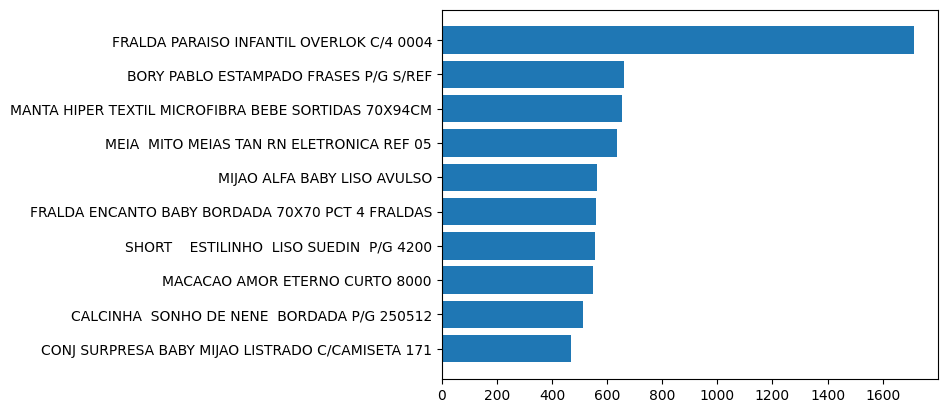

In [28]:
ax = plt.subplot()
ax.barh(serie.index, serie)

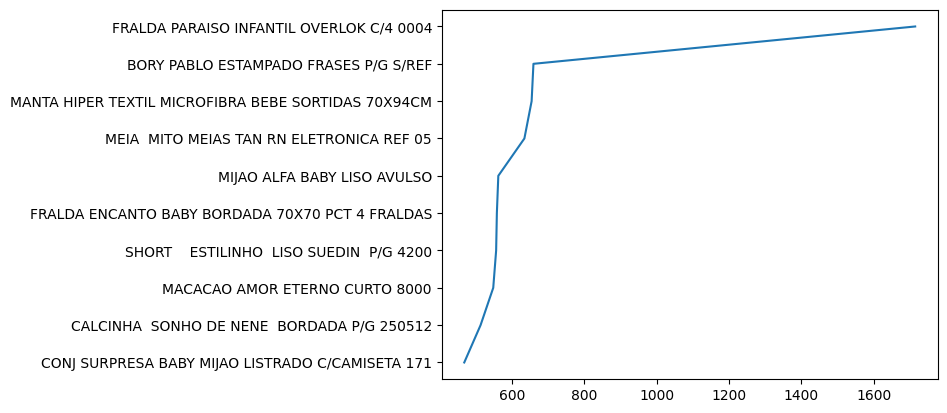

In [ ]:
ax = plt.subplot()
ax.plot(serie, serie.index)

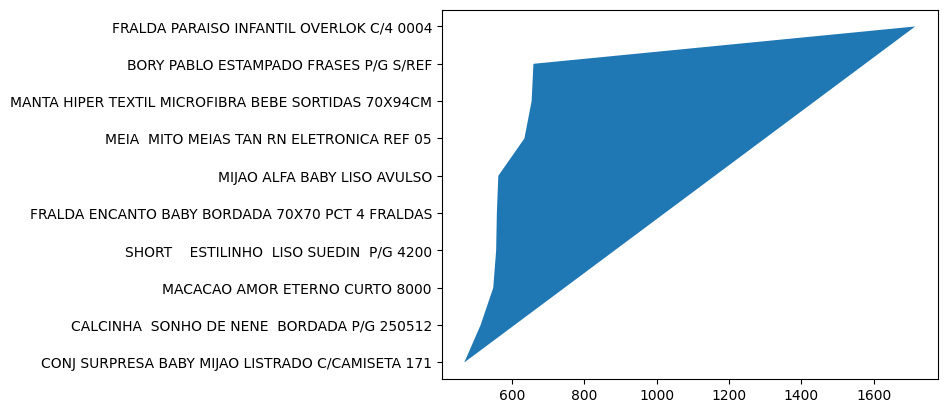

In [ ]:
ax = plt.subplot()
ax.fill(serie, serie.index)

In [ ]:
series = df.groupby('NomeCliente')['VlrTotal'].sum().sort_values(ascending=False)[0:40]
series

NomeCliente
IHULLYA KALILA ALMEIDA SILVA              14206.68
JOANA SIMONY DE SOUZA DE LIMA             11279.20
PAULA PAIVA CARNEIRO                      10660.98
AMANDA THACILA DOS SANTOS DA COSTA         9943.33
ANDREIA DA SILVA AIRES                     9741.36
CLODOALDO CLODOALDO                        9326.91
ALINE DE SOUZA SILVA DOS SANTOS            9249.97
ALINE SILVA SANTOS                         8993.70
CLEUDINALVA SILVEIRA GARCIA                8660.92
ANA PAULA DA SILVA CARVALHO LIMA           8307.72
ANA PAULA LIMA DE OLIVEIRA                 8063.82
TAYLANE CRISTINA VIERIA DE LIMA ROCHA      7635.63
RENATA DO NASCIMENTO FRACALOSSI            7558.68
ELIANE MOURA SOUSA                         7261.02
ALCILEA GOMES DA SILVA                     7156.48
AURINETE DOS SANTOS COSTA                  7015.27
GESSICA A. DO NASCIMENTO                   6858.21
JUDRIELE MARCIA DA SILVA OLIVEIRA DIAS     6821.62
JADNA FERREIRA  PACHECO                    6699.82
GABRIELA CARVALHO B

In [ ]:
series = series.sort_values()

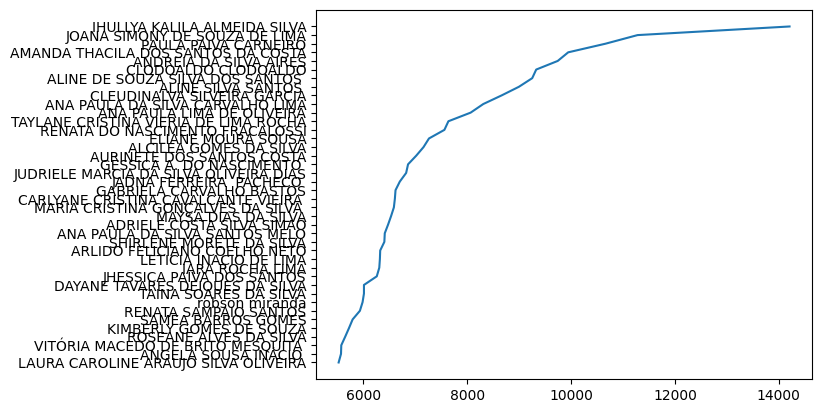

In [ ]:
ax = plt.subplot()
ax.plot(series, series.index)

In [ ]:
df['Data'] = pd.to_datetime(df.Data, utc=True)

In [ ]:
df['Data'].max()

Timestamp('2023-02-02 00:00:00+0000', tz='UTC')

In [ ]:
df['Data'].min()

Timestamp('2021-02-02 00:00:00+0000', tz='UTC')

In [ ]:
df.Data.mean()

Timestamp('2022-02-18 21:05:58.238625280+0000', tz='UTC')

In [ ]:
df.index = df.Data

In [ ]:
df

,Idade,QTD_FILHOS,Data,CodCliente,NomeCliente,Sexo,Item,CodVenda,CodProd,Descricao Produto,Qtde,Unitario,VlrBruto,VlrTotal
Data,,,,,,,,,,,,,,
2021-02-02 00:00:00+00:00,30.0,1,2021-02-02 00:00:00+00:00,1371,JULIANA SILVA DE SÁ,FEMININO,1.0,93725.0,42255.0,POTE SILVIA ART C/3UND PORCELANA BRANCO C/PUXA...,1.0,115.49,153.99,115.49
2021-02-02 00:00:00+00:00,36.0,1,2021-02-02 00:00:00+00:00,2798,ORLEANDA SOUSA CAMPOS BRITO,FEMININO,2.0,93697.0,47859.0,CONJ KYLY MASC.C/MASCARAS 1/3 110544,1.0,55.28,56.99,55.28
2021-02-02 00:00:00+00:00,36.0,1,2021-02-02 00:00:00+00:00,2798,ORLEANDA SOUSA CAMPOS BRITO,FEMININO,3.0,93697.0,48315.0,CONJ BRANDILI MASC.MACHAO 1/3 3424600,1.0,48.49,49.99,48.49
2021-02-02 00:00:00+00:00,36.0,1,2021-02-02 00:00:00+00:00,2798,ORLEANDA SOUSA CAMPOS BRITO,FEMININO,1.0,93697.0,48456.0,CONJ BRANDILI MASC.MACHAO 1/3 3425000,1.0,53.34,54.99,53.34
2021-02-02 00:00:00+00:00,41.0,1,2021-02-02 00:00:00+00:00,41671,CLEDIUZA ARAUJO DOS SANTOS,MASCULINO,1.0,93726.0,44160.0,COPO BUBA TOYS PAREDE DUPLA C/CANUDO ANIMAL G...,1.0,47.09,48.50,47.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02 00:00:00+00:00,38.0,1,2023-02-02 00:00:00+00:00,34211,MARINA DO NASCIMENTO SANTOS,FEMININO,1.0,121525.0,64327.0,SAPATO PIMPOLHO FEM DOURADO 01 16352C,1.0,26.80,66.99,26.80
2023-02-02 00:00:00+00:00,37.0,1,2023-02-02 00:00:00+00:00,303641,PAULA PAIVA CARNEIRO,MASCULINO,1.0,121533.0,72722.0,POLTRONA GARIANE BELA SEM PUFF VELUDO BEGE 404,-1.0,-569.00,-749.99,-569.00
2023-02-02 00:00:00+00:00,37.0,1,2023-02-02 00:00:00+00:00,303641,PAULA PAIVA CARNEIRO,MASCULINO,1.0,121534.0,72721.0,POLTRONA GARIANE BELA SEM PUFF VELUDO CINZA 301,1.0,569.00,749.99,569.00


In [ ]:
vendas_por_mes = df.groupby([df.index.year, df.index.month])['Item'].sum()
vendas_por_mes

Data  Data
2021  2        4476.0
      3       21502.0
      4        5992.0
      5        5633.0
      6       10905.0
      7       12409.0
      8       12748.0
      9        9311.0
      10       4314.0
      11       7425.0
      12       6714.0
2022  1        5490.0
      2        3970.0
      3       11210.0
      4        3094.0
      5        4731.0
      6        8413.0
      7        3403.0
      8        3058.0
      9        6110.0
      10       5566.0
      11      18821.0
      12       8952.0
2023  1       16441.0
      2          56.0
Name: Item, dtype: float64

In [ ]:
type(vendas_por_mes.index)

pandas.core.indexes.multi.MultiIndex

In [ ]:
vendas_por_mes.index = pd.Series(vendas_por_mes.index.values).apply(lambda tupla: str(tupla[0])+'-'+str(tupla[1]))

In [ ]:
vendas_por_mes

2021-2      4476.0
2021-3     21502.0
2021-4      5992.0
2021-5      5633.0
2021-6     10905.0
2021-7     12409.0
2021-8     12748.0
2021-9      9311.0
2021-10     4314.0
2021-11     7425.0
2021-12     6714.0
2022-1      5490.0
2022-2      3970.0
2022-3     11210.0
2022-4      3094.0
2022-5      4731.0
2022-6      8413.0
2022-7      3403.0
2022-8      3058.0
2022-9      6110.0
2022-10     5566.0
2022-11    18821.0
2022-12     8952.0
2023-1     16441.0
2023-2        56.0
Name: Item, dtype: float64

In [ ]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [ ]:
layout = {'title': 'Vendas por mês', 'xaxis': {'title': 'Mês'}, 'yaxis': {'title': 'Vendas($)'}}
data = [go.Scatter(x=vendas_por_mes.index, y=vendas_por_mes, mode='lines+markers',
                   marker={'color': 'blue'})]
fig = {'data': data, 'layout': layout}
iplot(fig)

In [ ]:
vendas_por_mes = df.groupby([df.index.year, df.index.month, 'Descricao Produto'])['VlrTotal'].sum()
vendas_por_mes

Data  Data  Descricao Produto                                            
2021  2      BORY  PIMPOLHO  CURTO FEM. 8445                                  26.77
             BORY  PIMPOLHO FEM  MANGA CURTA   RN/G  MESCLA SEREIA   8512     28.99
             BORY  PIMPOLHO MASC  S/MANGA  RN/G MARINHO TUBARAO 8505          22.05
             MAMADEIRA MAM EASY START NEUTRA 130  ML 4651                     48.50
             MEIA CALÇA  PIMPOLHO  POLIAMIDA ROSA 26-30   8832                20.27
                                                                              ...  
2023  2     SOUTIEN LUCITEX AMAMENTAR CHESS SATIN 44 5601                     50.99
            TALCO GRANADO INF TRADICIONAL 100G 13261                          15.99
            VESTIDO KYLY AMARELO CARAMBOLA 3 14046                           151.19
            VESTIDO KYLY OFF WHITE 4 14093                                   125.99
            VESTIDO PARANGOLE BB CIBELE 1/3 10400269                         221.99
Na

In [ ]:
type(vendas_por_mes.index)

pandas.core.indexes.multi.MultiIndex

In [ ]:
vendas_por_mes.index = pd.Series(vendas_por_mes.index.values).apply(lambda tupla: str(tupla[0])+'-'+str(tupla[1]))

In [ ]:
vendas_por_mes

2021-2     26.77
2021-2     28.99
2021-2     22.05
2021-2     48.50
2021-2     20.27
           ...  
2023-2     50.99
2023-2     15.99
2023-2    151.19
2023-2    125.99
2023-2    221.99
Name: VlrTotal, Length: 17641, dtype: float64

In [ ]:
layout = {'title': 'Vendas por mês', 'xaxis': {'title': 'Mês'}, 'yaxis': {'title': 'Vendas($)'}}
data = [go.Scatter(x=vendas_por_mes.index, y=vendas_por_mes, mode='lines+markers',
                   marker={'color': 'blue'})]
fig = {'data': data, 'layout': layout}
iplot(fig)